In [1]:
#
# Create a classifier for artistic painting matching
# 
# TRANSFER LEARNING Inception V3
# with DATA AUGMENTATION and DROPOUT
# Evaluate the model with any other image, the classifier will tell the to which artists the 
# input art is more similar
# Conclusion
# Author: Luis A. Mateos

# pip install tensorflow-datasets
# pip install tensorflow --upgrade
# pip install scipy

import os
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import os
path_base = os.getcwd()
#'\home\\github\ml-classifier-no-common-sense\\'
path_dir = os.path.join(path_base+'/artists/')

'''artists = ["Sandro_Botticelli","Jacques-Louis_David","Leonardo_Da_Vinci",
          "Eugene_Delacroix","Jean-Honore_Fragonard","Jean_Auguste_Dominique_Ingres",
          "Gustav_Klimt","Michelangelo","Claude_Monet",
          "Edvard_Munch","Rembrandt","Pierre-Auguste_Renoir",
          "Jan_van_Eyck","Vincent_Van_Gogh","Diego_Velazquez",
          "Johannes_Vermeer"]
'''

artists = []
folders = os.listdir(path_dir)
artists = folders
print(folders)
print(len(folders))

train_folders = []

for i in folders:
    train_folders.append(path_dir + i + '/')
    
train_folder_files = [[]]
# initilize array
train_folder_files[0] = os.listdir(train_folders[0])

# fill array with list of files from each folder
for i in range(1,len(train_folders)):
    train_folder_files.append(os.listdir(train_folders[i]))
    
for i in range(len(train_folders)):
    # print directories with training images
    print(train_folders[i])
    # print filename from each directory
    print(train_folder_files[i][0])
    print(train_folder_files[i][1])
    # print total training images
    print("Total training zero images= ", len(os.listdir(train_folders[i])))
    print("----------------------------")
    if i == 2:
        break

num_classes = len(train_folders)

['Albrecht_Altdorfer', 'Alexandre_Cabanel', 'Amedeo_Modigliani', 'Antoine_Watteau', 'Camille_Pissarro', 'Caravaggio', 'Caspar_David_Friedrich', 'Cassius_Marcellus_Coolidge', 'Childe_Hassam', 'Claude_Monet', 'Diego_Velazquez', 'Edgar_Degas', 'Edouard_Manet', 'Edvard_Munch', 'El_Greco', 'Francisco_Goya', 'Francois_Boucher', 'Franz_Marc', 'Gilbert_Stuart', 'Grant_Wood', 'Gustav_Klimt', 'Hubert_Robert', 'Ivan_Aivazovsky', 'Jacques-Louis_David', 'Jean-Francois_Millet', 'Johannes_Vermeer', 'John_Constable', 'Joseph_Mallord_William_Turner', 'Katsushika_Hokusai', 'Leonardo_Da_Vinci', 'Mary_Cassatt', 'Michelangelo', 'Paul_Cezanne', 'Paul_Klee', 'Pierre-Auguste_Renoir', 'Pieter_Bruegel_The_Elder', 'Raphael', 'Rembrandt', 'Sandro_Botticelli', 'Thomas_Gainsborough', 'Vincent_Van_Gogh', 'Wassily_Kandinsky', 'Wladyslaw_Podkowinski']
43
C:\Users\Josh\Documents\AIartist/artists/Albrecht_Altdorfer/
ascension-christ.jpg!Large.jpg
Battle_Of_Issus_by_Albrecht_Altdorfer_E1.jpg
Total training zero images=  

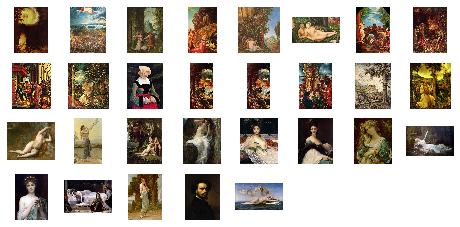

In [2]:
#
# Visualize some of the training images
#
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg   

nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 16
next_zero_pix = [os.path.join(train_folders[0], fname)
                for fname in train_folder_files[0][pic_index-16:pic_index]]
next_one_pix = [os.path.join(train_folders[1], fname)
                for fname in train_folder_files[1][pic_index-16:pic_index]]

for i, img_path in enumerate(next_zero_pix + next_one_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    #R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    #imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    #plt.imshow(imgGray, cmap='gray')
    
    plt.imshow(img, cmap='gray')
    
plt.show()

In [3]:
#
# Transfer learning
#
import tensorflow as tf
print(tf.__version__)

import urllib.request

from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                               include_top=False,
                               weights=None)

pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
    
pre_trained_model.summary()

2.5.0
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_________________________________________________________________________________

__________________________________________________________________________________________________
mixed0 (Concatenate)            (None, 16, 16, 256)  0           activation_5[0][0]               
                                                                 activation_7[0][0]               
                                                                 activation_10[0][0]              
                                                                 activation_11[0][0]              
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 16, 16, 64)   16384       mixed0[0][0]                     
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 16, 16, 64)   192         conv2d_15[0][0]                  
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, 16, 16, 64)   192         conv2d_19[0][0]                  
__________________________________________________________________________________________________
batch_normalization_21 (BatchNo (None, 16, 16, 64)   192         conv2d_21[0][0]                  
__________________________________________________________________________________________________
batch_normalization_24 (BatchNo (None, 16, 16, 96)   288         conv2d_24[0][0]                  
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 16, 16, 64)   192         conv2d_25[0][0]                  
__________________________________________________________________________________________________
activation_19 (Activation)      (None, 16, 16, 64)   0           batch_normalization_19[0][0]     
__________

batch_normalization_37 (BatchNo (None, 7, 7, 128)    384         conv2d_37[0][0]                  
__________________________________________________________________________________________________
activation_32 (Activation)      (None, 7, 7, 128)    0           batch_normalization_32[0][0]     
__________________________________________________________________________________________________
activation_37 (Activation)      (None, 7, 7, 128)    0           batch_normalization_37[0][0]     
__________________________________________________________________________________________________
average_pooling2d_3 (AveragePoo (None, 7, 7, 768)    0           mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 7, 7, 192)    147456      mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_33 

__________________________________________________________________________________________________
batch_normalization_40 (BatchNo (None, 7, 7, 192)    576         conv2d_40[0][0]                  
__________________________________________________________________________________________________
batch_normalization_43 (BatchNo (None, 7, 7, 192)    576         conv2d_43[0][0]                  
__________________________________________________________________________________________________
batch_normalization_48 (BatchNo (None, 7, 7, 192)    576         conv2d_48[0][0]                  
__________________________________________________________________________________________________
batch_normalization_49 (BatchNo (None, 7, 7, 192)    576         conv2d_49[0][0]                  
__________________________________________________________________________________________________
activation_40 (Activation)      (None, 7, 7, 192)    0           batch_normalization_40[0][0]     
__________

activation_59 (Activation)      (None, 7, 7, 192)    0           batch_normalization_59[0][0]     
__________________________________________________________________________________________________
mixed6 (Concatenate)            (None, 7, 7, 768)    0           activation_50[0][0]              
                                                                 activation_53[0][0]              
                                                                 activation_58[0][0]              
                                                                 activation_59[0][0]              
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 7, 7, 192)    147456      mixed6[0][0]                     
__________________________________________________________________________________________________
batch_normalization_64 (BatchNo (None, 7, 7, 192)    576         conv2d_64[0][0]                  
__________

batch_normalization_73 (BatchNo (None, 7, 7, 192)    576         conv2d_73[0][0]                  
__________________________________________________________________________________________________
activation_73 (Activation)      (None, 7, 7, 192)    0           batch_normalization_73[0][0]     
__________________________________________________________________________________________________
conv2d_70 (Conv2D)              (None, 7, 7, 192)    147456      mixed7[0][0]                     
__________________________________________________________________________________________________
conv2d_74 (Conv2D)              (None, 7, 7, 192)    258048      activation_73[0][0]              
__________________________________________________________________________________________________
batch_normalization_70 (BatchNo (None, 7, 7, 192)    576         conv2d_70[0][0]                  
__________________________________________________________________________________________________
batch_norm

activation_83 (Activation)      (None, 3, 3, 384)    0           batch_normalization_83[0][0]     
__________________________________________________________________________________________________
batch_normalization_84 (BatchNo (None, 3, 3, 192)    576         conv2d_84[0][0]                  
__________________________________________________________________________________________________
activation_76 (Activation)      (None, 3, 3, 320)    0           batch_normalization_76[0][0]     
__________________________________________________________________________________________________
mixed9_0 (Concatenate)          (None, 3, 3, 768)    0           activation_78[0][0]              
                                                                 activation_79[0][0]              
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 3, 3, 768)    0           activation_82[0][0]              
          

                                                                 mixed9_1[0][0]                   
                                                                 concatenate_1[0][0]              
                                                                 activation_93[0][0]              
Total params: 21,802,784
Trainable params: 0
Non-trainable params: 21,802,784
__________________________________________________________________________________________________


In [4]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [5]:
#
# TRANSFER LEARNING
#

x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input, x)

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )

In [6]:
# DATA AUGMENTATION withOUT NORMALIZATION 
#We use this visualizer for displaying the data augmentation only
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_visualizer = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=33,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator_visualizer = train_datagen_visualizer.flow_from_directory(path_base+'/artists/',
                                                    target_size=(150,150),#(28,28),
                                                    batch_size=64,
                                                    class_mode='binary')
#class_mode='categorical')

Found 1269 images belonging to 43 classes.


<class 'tuple'>
<class 'numpy.ndarray'>
(64, 150, 150, 3)


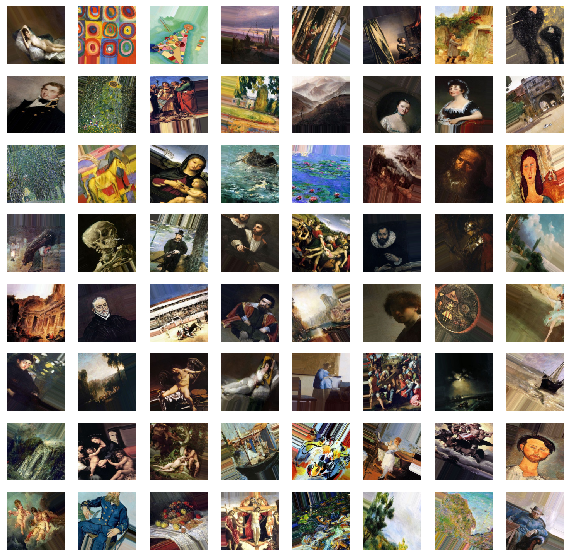

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(10, 10))
for image in train_generator_visualizer:
    print(type(image))
    print(type(image[0]))
    print(image[0].shape)
#    plt.imshow(image[0].astype("uint8"))
    break
    
plt.figure(figsize=(10, 10))
for images, labels in train_generator_visualizer:#.take(1):
    for i in range(64):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.axis("off")
    break

In [8]:
# Re RUN DATA AUGMENTATION with NORMALIZATION 
#(IF displaying the images will look all black from values between 0 to 1)

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=33,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(path_base+'/artists/',
                                                    target_size=(150,150),#(28,28),
                                                    batch_size=64,
                                                    class_mode='categorical')

Found 1269 images belonging to 43 classes.


In [9]:
history = model.fit(train_generator,
                   steps_per_epoch=8,
                   epochs=5000,
                   verbose=2)

Epoch 1/5000
8/8 - 14s - loss: 3.8943 - accuracy: 0.0801
Epoch 2/5000
8/8 - 10s - loss: 3.3946 - accuracy: 0.1211
Epoch 3/5000
8/8 - 9s - loss: 3.1034 - accuracy: 0.2070
Epoch 4/5000
8/8 - 9s - loss: 3.0625 - accuracy: 0.2335
Epoch 5/5000
8/8 - 9s - loss: 2.8795 - accuracy: 0.2315
Epoch 6/5000
8/8 - 9s - loss: 2.8562 - accuracy: 0.2598
Epoch 7/5000
8/8 - 9s - loss: 2.6706 - accuracy: 0.3086
Epoch 8/5000
8/8 - 9s - loss: 2.5997 - accuracy: 0.3034
Epoch 9/5000
8/8 - 9s - loss: 2.4365 - accuracy: 0.3301
Epoch 10/5000
8/8 - 8s - loss: 2.3317 - accuracy: 0.3653
Epoch 11/5000
8/8 - 9s - loss: 2.3203 - accuracy: 0.3691
Epoch 12/5000
8/8 - 9s - loss: 2.2387 - accuracy: 0.3906
Epoch 13/5000
8/8 - 9s - loss: 2.1395 - accuracy: 0.4062
Epoch 14/5000
8/8 - 9s - loss: 2.1179 - accuracy: 0.4043
Epoch 15/5000
8/8 - 8s - loss: 2.0328 - accuracy: 0.4232
Epoch 16/5000
8/8 - 9s - loss: 2.0929 - accuracy: 0.4453
Epoch 17/5000
8/8 - 9s - loss: 1.9170 - accuracy: 0.4511
Epoch 18/5000
8/8 - 9s - loss: 1.9026 

Epoch 144/5000
8/8 - 9s - loss: 0.5267 - accuracy: 0.8398
Epoch 145/5000
8/8 - 9s - loss: 0.5521 - accuracy: 0.8403
Epoch 146/5000
8/8 - 9s - loss: 0.5505 - accuracy: 0.8262
Epoch 147/5000
8/8 - 9s - loss: 0.6027 - accuracy: 0.8164
Epoch 148/5000
8/8 - 9s - loss: 0.5681 - accuracy: 0.8203
Epoch 149/5000
8/8 - 9s - loss: 0.5765 - accuracy: 0.8242
Epoch 150/5000
8/8 - 9s - loss: 0.6222 - accuracy: 0.8105
Epoch 151/5000
8/8 - 8s - loss: 0.5876 - accuracy: 0.8204
Epoch 152/5000
8/8 - 9s - loss: 0.5274 - accuracy: 0.8027
Epoch 153/5000
8/8 - 9s - loss: 0.5953 - accuracy: 0.8104
Epoch 154/5000
8/8 - 10s - loss: 0.5824 - accuracy: 0.7988
Epoch 155/5000
8/8 - 10s - loss: 0.6258 - accuracy: 0.8144
Epoch 156/5000
8/8 - 9s - loss: 0.5824 - accuracy: 0.8008
Epoch 157/5000
8/8 - 9s - loss: 0.5834 - accuracy: 0.8203
Epoch 158/5000
8/8 - 9s - loss: 0.5782 - accuracy: 0.8224
Epoch 159/5000
8/8 - 9s - loss: 0.5357 - accuracy: 0.8320
Epoch 160/5000
8/8 - 9s - loss: 0.5901 - accuracy: 0.8164
Epoch 161/50

Epoch 285/5000
8/8 - 9s - loss: 0.4100 - accuracy: 0.8643
Epoch 286/5000
8/8 - 9s - loss: 0.3874 - accuracy: 0.8828
Epoch 287/5000
8/8 - 9s - loss: 0.4370 - accuracy: 0.8672
Epoch 288/5000
8/8 - 9s - loss: 0.4367 - accuracy: 0.8613
Epoch 289/5000
8/8 - 9s - loss: 0.4003 - accuracy: 0.8711
Epoch 290/5000
8/8 - 9s - loss: 0.4557 - accuracy: 0.8623
Epoch 291/5000
8/8 - 9s - loss: 0.3618 - accuracy: 0.8770
Epoch 292/5000
8/8 - 9s - loss: 0.4047 - accuracy: 0.8828
Epoch 293/5000
8/8 - 9s - loss: 0.3841 - accuracy: 0.8848
Epoch 294/5000
8/8 - 9s - loss: 0.4500 - accuracy: 0.8535
Epoch 295/5000
8/8 - 9s - loss: 0.4205 - accuracy: 0.8652
Epoch 296/5000
8/8 - 8s - loss: 0.3658 - accuracy: 0.8703
Epoch 297/5000
8/8 - 9s - loss: 0.4355 - accuracy: 0.8457
Epoch 298/5000
8/8 - 9s - loss: 0.4300 - accuracy: 0.8574
Epoch 299/5000
8/8 - 9s - loss: 0.3833 - accuracy: 0.8809
Epoch 300/5000
8/8 - 9s - loss: 0.4276 - accuracy: 0.8643
Epoch 301/5000
8/8 - 9s - loss: 0.4188 - accuracy: 0.8770
Epoch 302/5000

Epoch 426/5000
8/8 - 9s - loss: 0.3145 - accuracy: 0.8809
Epoch 427/5000
8/8 - 9s - loss: 0.3487 - accuracy: 0.8809
Epoch 428/5000
8/8 - 9s - loss: 0.3425 - accuracy: 0.9004
Epoch 429/5000
8/8 - 9s - loss: 0.3013 - accuracy: 0.8887
Epoch 430/5000
8/8 - 10s - loss: 0.4130 - accuracy: 0.8782
Epoch 431/5000
8/8 - 10s - loss: 0.3693 - accuracy: 0.8848
Epoch 432/5000
8/8 - 9s - loss: 0.3412 - accuracy: 0.8782
Epoch 433/5000
8/8 - 9s - loss: 0.4005 - accuracy: 0.8822
Epoch 434/5000
8/8 - 9s - loss: 0.3142 - accuracy: 0.8862
Epoch 435/5000
8/8 - 8s - loss: 0.3966 - accuracy: 0.8802
Epoch 436/5000
8/8 - 9s - loss: 0.3520 - accuracy: 0.8945
Epoch 437/5000
8/8 - 9s - loss: 0.2865 - accuracy: 0.8984
Epoch 438/5000
8/8 - 9s - loss: 0.3738 - accuracy: 0.8867
Epoch 439/5000
8/8 - 9s - loss: 0.3948 - accuracy: 0.8782
Epoch 440/5000
8/8 - 9s - loss: 0.3597 - accuracy: 0.8789
Epoch 441/5000
8/8 - 9s - loss: 0.3982 - accuracy: 0.8887
Epoch 442/5000
8/8 - 9s - loss: 0.3041 - accuracy: 0.8965
Epoch 443/50

Epoch 567/5000
8/8 - 8s - loss: 0.3084 - accuracy: 0.9004
Epoch 568/5000
8/8 - 8s - loss: 0.2381 - accuracy: 0.9121
Epoch 569/5000
8/8 - 8s - loss: 0.3199 - accuracy: 0.8965
Epoch 570/5000
8/8 - 8s - loss: 0.3072 - accuracy: 0.8867
Epoch 571/5000
8/8 - 8s - loss: 0.3175 - accuracy: 0.9004
Epoch 572/5000
8/8 - 8s - loss: 0.2992 - accuracy: 0.8982
Epoch 573/5000
8/8 - 8s - loss: 0.3565 - accuracy: 0.8882
Epoch 574/5000
8/8 - 8s - loss: 0.2529 - accuracy: 0.9142
Epoch 575/5000
8/8 - 8s - loss: 0.2994 - accuracy: 0.8902
Epoch 576/5000
8/8 - 8s - loss: 0.3463 - accuracy: 0.8750
Epoch 577/5000
8/8 - 11s - loss: 0.2857 - accuracy: 0.9219
Epoch 578/5000
8/8 - 9s - loss: 0.3567 - accuracy: 0.8867
Epoch 579/5000
8/8 - 8s - loss: 0.3028 - accuracy: 0.9121
Epoch 580/5000
8/8 - 9s - loss: 0.3580 - accuracy: 0.8867
Epoch 581/5000
8/8 - 8s - loss: 0.2655 - accuracy: 0.9182
Epoch 582/5000
8/8 - 8s - loss: 0.3820 - accuracy: 0.8822
Epoch 583/5000
8/8 - 8s - loss: 0.3141 - accuracy: 0.9062
Epoch 584/500

Epoch 708/5000
8/8 - 9s - loss: 0.2734 - accuracy: 0.9062
Epoch 709/5000
8/8 - 9s - loss: 0.2675 - accuracy: 0.9297
Epoch 710/5000
8/8 - 9s - loss: 0.2721 - accuracy: 0.8926
Epoch 711/5000
8/8 - 8s - loss: 0.2943 - accuracy: 0.9180
Epoch 712/5000
8/8 - 9s - loss: 0.3583 - accuracy: 0.8828
Epoch 713/5000
8/8 - 9s - loss: 0.2877 - accuracy: 0.9082
Epoch 714/5000
8/8 - 9s - loss: 0.2088 - accuracy: 0.9361
Epoch 715/5000
8/8 - 9s - loss: 0.2686 - accuracy: 0.9162
Epoch 716/5000
8/8 - 9s - loss: 0.3113 - accuracy: 0.9002
Epoch 717/5000
8/8 - 9s - loss: 0.2468 - accuracy: 0.9316
Epoch 718/5000
8/8 - 9s - loss: 0.2690 - accuracy: 0.9102
Epoch 719/5000
8/8 - 9s - loss: 0.2964 - accuracy: 0.8984
Epoch 720/5000
8/8 - 9s - loss: 0.3297 - accuracy: 0.8945
Epoch 721/5000
8/8 - 9s - loss: 0.3494 - accuracy: 0.8887
Epoch 722/5000
8/8 - 9s - loss: 0.2691 - accuracy: 0.9043
Epoch 723/5000
8/8 - 9s - loss: 0.3055 - accuracy: 0.8965
Epoch 724/5000
8/8 - 9s - loss: 0.3407 - accuracy: 0.8906
Epoch 725/5000

Epoch 848/5000
8/8 - 10s - loss: 0.3378 - accuracy: 0.8962
Epoch 849/5000
8/8 - 9s - loss: 0.2804 - accuracy: 0.9141
Epoch 850/5000
8/8 - 9s - loss: 0.2829 - accuracy: 0.9199
Epoch 851/5000
8/8 - 9s - loss: 0.2675 - accuracy: 0.9142
Epoch 852/5000
8/8 - 9s - loss: 0.2540 - accuracy: 0.9162
Epoch 853/5000
8/8 - 9s - loss: 0.2811 - accuracy: 0.9261
Epoch 854/5000
8/8 - 9s - loss: 0.3091 - accuracy: 0.9042
Epoch 855/5000
8/8 - 9s - loss: 0.2914 - accuracy: 0.9042
Epoch 856/5000
8/8 - 10s - loss: 0.2906 - accuracy: 0.9023
Epoch 857/5000
8/8 - 9s - loss: 0.2579 - accuracy: 0.9082
Epoch 858/5000
8/8 - 9s - loss: 0.3332 - accuracy: 0.9023
Epoch 859/5000
8/8 - 9s - loss: 0.3338 - accuracy: 0.8882
Epoch 860/5000
8/8 - 9s - loss: 0.3138 - accuracy: 0.9022
Epoch 861/5000
8/8 - 9s - loss: 0.2083 - accuracy: 0.9297
Epoch 862/5000
8/8 - 9s - loss: 0.2938 - accuracy: 0.9022
Epoch 863/5000
8/8 - 9s - loss: 0.2462 - accuracy: 0.9336
Epoch 864/5000
8/8 - 9s - loss: 0.1851 - accuracy: 0.9414
Epoch 865/50

Epoch 989/5000
8/8 - 9s - loss: 0.2348 - accuracy: 0.9121
Epoch 990/5000
8/8 - 9s - loss: 0.3069 - accuracy: 0.9160
Epoch 991/5000
8/8 - 9s - loss: 0.2561 - accuracy: 0.9199
Epoch 992/5000
8/8 - 9s - loss: 0.2700 - accuracy: 0.9222
Epoch 993/5000
8/8 - 9s - loss: 0.2689 - accuracy: 0.9004
Epoch 994/5000
8/8 - 9s - loss: 0.3262 - accuracy: 0.9042
Epoch 995/5000
8/8 - 9s - loss: 0.2479 - accuracy: 0.9277
Epoch 996/5000
8/8 - 10s - loss: 0.2662 - accuracy: 0.9180
Epoch 997/5000
8/8 - 9s - loss: 0.2154 - accuracy: 0.9258
Epoch 998/5000
8/8 - 9s - loss: 0.2412 - accuracy: 0.9242
Epoch 999/5000
8/8 - 9s - loss: 0.2346 - accuracy: 0.9199
Epoch 1000/5000
8/8 - 9s - loss: 0.2015 - accuracy: 0.9277
Epoch 1001/5000
8/8 - 9s - loss: 0.2396 - accuracy: 0.9222
Epoch 1002/5000
8/8 - 9s - loss: 0.2425 - accuracy: 0.9162
Epoch 1003/5000
8/8 - 9s - loss: 0.2544 - accuracy: 0.9219
Epoch 1004/5000
8/8 - 9s - loss: 0.2678 - accuracy: 0.9141
Epoch 1005/5000
8/8 - 9s - loss: 0.1924 - accuracy: 0.9381
Epoch 1

Epoch 1128/5000
8/8 - 9s - loss: 0.2629 - accuracy: 0.9219
Epoch 1129/5000
8/8 - 9s - loss: 0.2149 - accuracy: 0.9258
Epoch 1130/5000
8/8 - 9s - loss: 0.1807 - accuracy: 0.9453
Epoch 1131/5000
8/8 - 9s - loss: 0.2198 - accuracy: 0.9297
Epoch 1132/5000
8/8 - 9s - loss: 0.2514 - accuracy: 0.9238
Epoch 1133/5000
8/8 - 9s - loss: 0.2583 - accuracy: 0.9297
Epoch 1134/5000
8/8 - 8s - loss: 0.1905 - accuracy: 0.9401
Epoch 1135/5000
8/8 - 9s - loss: 0.2103 - accuracy: 0.9242
Epoch 1136/5000
8/8 - 10s - loss: 0.1798 - accuracy: 0.9481
Epoch 1137/5000
8/8 - 10s - loss: 0.1786 - accuracy: 0.9336
Epoch 1138/5000
8/8 - 9s - loss: 0.2494 - accuracy: 0.9238
Epoch 1139/5000
8/8 - 9s - loss: 0.2253 - accuracy: 0.9395
Epoch 1140/5000
8/8 - 9s - loss: 0.2049 - accuracy: 0.9381
Epoch 1141/5000
8/8 - 9s - loss: 0.2213 - accuracy: 0.9141
Epoch 1142/5000
8/8 - 9s - loss: 0.3132 - accuracy: 0.9082
Epoch 1143/5000
8/8 - 9s - loss: 0.2147 - accuracy: 0.9258
Epoch 1144/5000
8/8 - 9s - loss: 0.1625 - accuracy: 0.

Epoch 1267/5000
8/8 - 8s - loss: 0.2285 - accuracy: 0.9222
Epoch 1268/5000
8/8 - 8s - loss: 0.2228 - accuracy: 0.9238
Epoch 1269/5000
8/8 - 8s - loss: 0.2101 - accuracy: 0.9421
Epoch 1270/5000
8/8 - 9s - loss: 0.2436 - accuracy: 0.9336
Epoch 1271/5000
8/8 - 8s - loss: 0.1939 - accuracy: 0.9401
Epoch 1272/5000
8/8 - 8s - loss: 0.2525 - accuracy: 0.9281
Epoch 1273/5000
8/8 - 8s - loss: 0.2054 - accuracy: 0.9321
Epoch 1274/5000
8/8 - 8s - loss: 0.1893 - accuracy: 0.9441
Epoch 1275/5000
8/8 - 8s - loss: 0.2544 - accuracy: 0.9297
Epoch 1276/5000
8/8 - 8s - loss: 0.2197 - accuracy: 0.9258
Epoch 1277/5000
8/8 - 8s - loss: 0.2225 - accuracy: 0.9202
Epoch 1278/5000
8/8 - 8s - loss: 0.2591 - accuracy: 0.9199
Epoch 1279/5000
8/8 - 9s - loss: 0.2374 - accuracy: 0.9142
Epoch 1280/5000
8/8 - 9s - loss: 0.1754 - accuracy: 0.9481
Epoch 1281/5000
8/8 - 9s - loss: 0.1873 - accuracy: 0.9395
Epoch 1282/5000
8/8 - 9s - loss: 0.2088 - accuracy: 0.9277
Epoch 1283/5000
8/8 - 8s - loss: 0.2104 - accuracy: 0.91

Epoch 1406/5000
8/8 - 9s - loss: 0.2116 - accuracy: 0.9341
Epoch 1407/5000
8/8 - 9s - loss: 0.1769 - accuracy: 0.9336
Epoch 1408/5000
8/8 - 9s - loss: 0.2892 - accuracy: 0.9121
Epoch 1409/5000
8/8 - 8s - loss: 0.1669 - accuracy: 0.9401
Epoch 1410/5000
8/8 - 9s - loss: 0.1703 - accuracy: 0.9473
Epoch 1411/5000
8/8 - 8s - loss: 0.1732 - accuracy: 0.9355
Epoch 1412/5000
8/8 - 8s - loss: 0.2155 - accuracy: 0.9202
Epoch 1413/5000
8/8 - 8s - loss: 0.1593 - accuracy: 0.9521
Epoch 1414/5000
8/8 - 9s - loss: 0.2433 - accuracy: 0.9238
Epoch 1415/5000
8/8 - 9s - loss: 0.2025 - accuracy: 0.9401
Epoch 1416/5000
8/8 - 9s - loss: 0.1930 - accuracy: 0.9381
Epoch 1417/5000
8/8 - 9s - loss: 0.2019 - accuracy: 0.9258
Epoch 1418/5000
8/8 - 9s - loss: 0.1618 - accuracy: 0.9531
Epoch 1419/5000
8/8 - 8s - loss: 0.2038 - accuracy: 0.9421
Epoch 1420/5000
8/8 - 8s - loss: 0.2472 - accuracy: 0.9219
Epoch 1421/5000
8/8 - 8s - loss: 0.1524 - accuracy: 0.9512
Epoch 1422/5000
8/8 - 9s - loss: 0.2120 - accuracy: 0.93

Epoch 1545/5000
8/8 - 8s - loss: 0.1754 - accuracy: 0.9355
Epoch 1546/5000
8/8 - 9s - loss: 0.2489 - accuracy: 0.9180
Epoch 1547/5000
8/8 - 8s - loss: 0.2158 - accuracy: 0.9321
Epoch 1548/5000
8/8 - 8s - loss: 0.1918 - accuracy: 0.9281
Epoch 1549/5000
8/8 - 8s - loss: 0.1373 - accuracy: 0.9609
Epoch 1550/5000
8/8 - 8s - loss: 0.2065 - accuracy: 0.9301
Epoch 1551/5000
8/8 - 8s - loss: 0.1573 - accuracy: 0.9609
Epoch 1552/5000
8/8 - 8s - loss: 0.2253 - accuracy: 0.9361
Epoch 1553/5000
8/8 - 8s - loss: 0.2673 - accuracy: 0.9199
Epoch 1554/5000
8/8 - 8s - loss: 0.2442 - accuracy: 0.9199
Epoch 1555/5000
8/8 - 8s - loss: 0.2068 - accuracy: 0.9277
Epoch 1556/5000
8/8 - 8s - loss: 0.2138 - accuracy: 0.9381
Epoch 1557/5000
8/8 - 8s - loss: 0.1850 - accuracy: 0.9414
Epoch 1558/5000
8/8 - 8s - loss: 0.2017 - accuracy: 0.9401
Epoch 1559/5000
8/8 - 8s - loss: 0.1921 - accuracy: 0.9414
Epoch 1560/5000
8/8 - 8s - loss: 0.1946 - accuracy: 0.9441
Epoch 1561/5000
8/8 - 8s - loss: 0.1929 - accuracy: 0.94

Epoch 1684/5000
8/8 - 8s - loss: 0.2475 - accuracy: 0.9182
Epoch 1685/5000
8/8 - 9s - loss: 0.1839 - accuracy: 0.9521
Epoch 1686/5000
8/8 - 8s - loss: 0.2194 - accuracy: 0.9321
Epoch 1687/5000
8/8 - 8s - loss: 0.2033 - accuracy: 0.9441
Epoch 1688/5000
8/8 - 9s - loss: 0.1958 - accuracy: 0.9441
Epoch 1689/5000
8/8 - 9s - loss: 0.1314 - accuracy: 0.9551
Epoch 1690/5000
8/8 - 9s - loss: 0.1609 - accuracy: 0.9512
Epoch 1691/5000
8/8 - 9s - loss: 0.2640 - accuracy: 0.9121
Epoch 1692/5000
8/8 - 9s - loss: 0.1605 - accuracy: 0.9453
Epoch 1693/5000
8/8 - 8s - loss: 0.1758 - accuracy: 0.9453
Epoch 1694/5000
8/8 - 8s - loss: 0.1709 - accuracy: 0.9441
Epoch 1695/5000
8/8 - 8s - loss: 0.1704 - accuracy: 0.9481
Epoch 1696/5000
8/8 - 8s - loss: 0.2273 - accuracy: 0.9395
Epoch 1697/5000
8/8 - 9s - loss: 0.1497 - accuracy: 0.9551
Epoch 1698/5000
8/8 - 9s - loss: 0.1981 - accuracy: 0.9336
Epoch 1699/5000
8/8 - 8s - loss: 0.2355 - accuracy: 0.9277
Epoch 1700/5000
8/8 - 8s - loss: 0.1806 - accuracy: 0.93

Epoch 1823/5000
8/8 - 9s - loss: 0.2067 - accuracy: 0.9361
Epoch 1824/5000
8/8 - 8s - loss: 0.1600 - accuracy: 0.9492
Epoch 1825/5000
8/8 - 9s - loss: 0.2628 - accuracy: 0.9238
Epoch 1826/5000
8/8 - 9s - loss: 0.1941 - accuracy: 0.9395
Epoch 1827/5000
8/8 - 9s - loss: 0.1953 - accuracy: 0.9375
Epoch 1828/5000
8/8 - 9s - loss: 0.2177 - accuracy: 0.9261
Epoch 1829/5000
8/8 - 8s - loss: 0.2434 - accuracy: 0.9222
Epoch 1830/5000
8/8 - 9s - loss: 0.1864 - accuracy: 0.9441
Epoch 1831/5000
8/8 - 9s - loss: 0.2407 - accuracy: 0.9297
Epoch 1832/5000
8/8 - 8s - loss: 0.1773 - accuracy: 0.9473
Epoch 1833/5000
8/8 - 8s - loss: 0.1410 - accuracy: 0.9461
Epoch 1834/5000
8/8 - 9s - loss: 0.2172 - accuracy: 0.9316
Epoch 1835/5000
8/8 - 9s - loss: 0.0934 - accuracy: 0.9681
Epoch 1836/5000
8/8 - 9s - loss: 0.2282 - accuracy: 0.9375
Epoch 1837/5000
8/8 - 9s - loss: 0.2314 - accuracy: 0.9258
Epoch 1838/5000
8/8 - 8s - loss: 0.1526 - accuracy: 0.9381
Epoch 1839/5000
8/8 - 8s - loss: 0.1566 - accuracy: 0.95

Epoch 1962/5000
8/8 - 9s - loss: 0.2093 - accuracy: 0.9395
Epoch 1963/5000
8/8 - 10s - loss: 0.1566 - accuracy: 0.9570
Epoch 1964/5000
8/8 - 10s - loss: 0.2185 - accuracy: 0.9297
Epoch 1965/5000
8/8 - 11s - loss: 0.1911 - accuracy: 0.9355
Epoch 1966/5000
8/8 - 11s - loss: 0.1845 - accuracy: 0.9375
Epoch 1967/5000
8/8 - 12s - loss: 0.1890 - accuracy: 0.9453
Epoch 1968/5000
8/8 - 10s - loss: 0.2290 - accuracy: 0.9434
Epoch 1969/5000
8/8 - 10s - loss: 0.1613 - accuracy: 0.9541
Epoch 1970/5000
8/8 - 10s - loss: 0.1693 - accuracy: 0.9481
Epoch 1971/5000
8/8 - 9s - loss: 0.1601 - accuracy: 0.9581
Epoch 1972/5000
8/8 - 10s - loss: 0.2616 - accuracy: 0.9238
Epoch 1973/5000
8/8 - 10s - loss: 0.1848 - accuracy: 0.9316
Epoch 1974/5000
8/8 - 10s - loss: 0.1316 - accuracy: 0.9581
Epoch 1975/5000
8/8 - 10s - loss: 0.1885 - accuracy: 0.9414
Epoch 1976/5000
8/8 - 11s - loss: 0.1825 - accuracy: 0.9381
Epoch 1977/5000
8/8 - 11s - loss: 0.1446 - accuracy: 0.9461
Epoch 1978/5000
8/8 - 10s - loss: 0.2191 -

Epoch 2100/5000
8/8 - 9s - loss: 0.1955 - accuracy: 0.9375
Epoch 2101/5000
8/8 - 9s - loss: 0.2121 - accuracy: 0.9434
Epoch 2102/5000
8/8 - 9s - loss: 0.1963 - accuracy: 0.9242
Epoch 2103/5000
8/8 - 9s - loss: 0.1930 - accuracy: 0.9453
Epoch 2104/5000
8/8 - 8s - loss: 0.1520 - accuracy: 0.9512
Epoch 2105/5000
8/8 - 8s - loss: 0.1180 - accuracy: 0.9541
Epoch 2106/5000
8/8 - 9s - loss: 0.1691 - accuracy: 0.9434
Epoch 2107/5000
8/8 - 8s - loss: 0.2083 - accuracy: 0.9321
Epoch 2108/5000
8/8 - 9s - loss: 0.1783 - accuracy: 0.9434
Epoch 2109/5000
8/8 - 8s - loss: 0.2646 - accuracy: 0.9238
Epoch 2110/5000
8/8 - 9s - loss: 0.1747 - accuracy: 0.9531
Epoch 2111/5000
8/8 - 9s - loss: 0.2168 - accuracy: 0.9421
Epoch 2112/5000
8/8 - 9s - loss: 0.1862 - accuracy: 0.9297
Epoch 2113/5000
8/8 - 9s - loss: 0.2017 - accuracy: 0.9277
Epoch 2114/5000
8/8 - 9s - loss: 0.1869 - accuracy: 0.9355
Epoch 2115/5000
8/8 - 9s - loss: 0.1368 - accuracy: 0.9453
Epoch 2116/5000
8/8 - 9s - loss: 0.1759 - accuracy: 0.94

Epoch 2239/5000
8/8 - 9s - loss: 0.1833 - accuracy: 0.9414
Epoch 2240/5000
8/8 - 9s - loss: 0.1204 - accuracy: 0.9581
Epoch 2241/5000
8/8 - 9s - loss: 0.1237 - accuracy: 0.9746
Epoch 2242/5000
8/8 - 9s - loss: 0.2299 - accuracy: 0.9341
Epoch 2243/5000
8/8 - 9s - loss: 0.1788 - accuracy: 0.9521
Epoch 2244/5000
8/8 - 9s - loss: 0.1439 - accuracy: 0.9512
Epoch 2245/5000
8/8 - 9s - loss: 0.1808 - accuracy: 0.9381
Epoch 2246/5000
8/8 - 9s - loss: 0.1828 - accuracy: 0.9355
Epoch 2247/5000
8/8 - 9s - loss: 0.1995 - accuracy: 0.9281
Epoch 2248/5000
8/8 - 9s - loss: 0.1573 - accuracy: 0.9561
Epoch 2249/5000
8/8 - 9s - loss: 0.2069 - accuracy: 0.9453
Epoch 2250/5000
8/8 - 13s - loss: 0.1938 - accuracy: 0.9277
Epoch 2251/5000
8/8 - 9s - loss: 0.1497 - accuracy: 0.9512
Epoch 2252/5000
8/8 - 9s - loss: 0.1798 - accuracy: 0.9355
Epoch 2253/5000
8/8 - 8s - loss: 0.2533 - accuracy: 0.9361
Epoch 2254/5000
8/8 - 9s - loss: 0.1430 - accuracy: 0.9531
Epoch 2255/5000
8/8 - 9s - loss: 0.2185 - accuracy: 0.9

Epoch 2378/5000
8/8 - 9s - loss: 0.1212 - accuracy: 0.9601
Epoch 2379/5000
8/8 - 9s - loss: 0.1490 - accuracy: 0.9492
Epoch 2380/5000
8/8 - 10s - loss: 0.1798 - accuracy: 0.9258
Epoch 2381/5000
8/8 - 10s - loss: 0.2109 - accuracy: 0.9355
Epoch 2382/5000
8/8 - 10s - loss: 0.1687 - accuracy: 0.9541
Epoch 2383/5000
8/8 - 12s - loss: 0.1934 - accuracy: 0.9277
Epoch 2384/5000
8/8 - 9s - loss: 0.2330 - accuracy: 0.9375
Epoch 2385/5000
8/8 - 9s - loss: 0.1429 - accuracy: 0.9541
Epoch 2386/5000
8/8 - 9s - loss: 0.1420 - accuracy: 0.9492
Epoch 2387/5000
8/8 - 9s - loss: 0.2160 - accuracy: 0.9258
Epoch 2388/5000
8/8 - 9s - loss: 0.2324 - accuracy: 0.9277
Epoch 2389/5000
8/8 - 9s - loss: 0.2069 - accuracy: 0.9441
Epoch 2390/5000
8/8 - 9s - loss: 0.2069 - accuracy: 0.9355
Epoch 2391/5000
8/8 - 9s - loss: 0.1606 - accuracy: 0.9401
Epoch 2392/5000
8/8 - 9s - loss: 0.1609 - accuracy: 0.9473
Epoch 2393/5000
8/8 - 9s - loss: 0.1681 - accuracy: 0.9395
Epoch 2394/5000
8/8 - 9s - loss: 0.1577 - accuracy: 

Epoch 2517/5000
8/8 - 9s - loss: 0.2031 - accuracy: 0.9395
Epoch 2518/5000
8/8 - 8s - loss: 0.1710 - accuracy: 0.9461
Epoch 2519/5000
8/8 - 9s - loss: 0.1418 - accuracy: 0.9570
Epoch 2520/5000
8/8 - 9s - loss: 0.1552 - accuracy: 0.9601
Epoch 2521/5000
8/8 - 8s - loss: 0.1678 - accuracy: 0.9481
Epoch 2522/5000
8/8 - 8s - loss: 0.1544 - accuracy: 0.9461
Epoch 2523/5000
8/8 - 9s - loss: 0.1617 - accuracy: 0.9492
Epoch 2524/5000
8/8 - 9s - loss: 0.1825 - accuracy: 0.9355
Epoch 2525/5000
8/8 - 9s - loss: 0.1733 - accuracy: 0.9355
Epoch 2526/5000
8/8 - 9s - loss: 0.1795 - accuracy: 0.9277
Epoch 2527/5000
8/8 - 8s - loss: 0.1339 - accuracy: 0.9551
Epoch 2528/5000
8/8 - 8s - loss: 0.1459 - accuracy: 0.9561
Epoch 2529/5000
8/8 - 8s - loss: 0.1827 - accuracy: 0.9461
Epoch 2530/5000
8/8 - 8s - loss: 0.1693 - accuracy: 0.9421
Epoch 2531/5000
8/8 - 8s - loss: 0.1675 - accuracy: 0.9501
Epoch 2532/5000
8/8 - 9s - loss: 0.1882 - accuracy: 0.9395
Epoch 2533/5000
8/8 - 9s - loss: 0.1198 - accuracy: 0.96

Epoch 2656/5000
8/8 - 8s - loss: 0.1788 - accuracy: 0.9492
Epoch 2657/5000
8/8 - 8s - loss: 0.2073 - accuracy: 0.9381
Epoch 2658/5000
8/8 - 8s - loss: 0.1920 - accuracy: 0.9316
Epoch 2659/5000
8/8 - 9s - loss: 0.1251 - accuracy: 0.9601
Epoch 2660/5000
8/8 - 9s - loss: 0.1913 - accuracy: 0.9381
Epoch 2661/5000
8/8 - 9s - loss: 0.1406 - accuracy: 0.9492
Epoch 2662/5000
8/8 - 8s - loss: 0.1914 - accuracy: 0.9441
Epoch 2663/5000
8/8 - 9s - loss: 0.1603 - accuracy: 0.9453
Epoch 2664/5000
8/8 - 8s - loss: 0.1969 - accuracy: 0.9461
Epoch 2665/5000
8/8 - 8s - loss: 0.1318 - accuracy: 0.9551
Epoch 2666/5000
8/8 - 9s - loss: 0.1544 - accuracy: 0.9590
Epoch 2667/5000
8/8 - 9s - loss: 0.1763 - accuracy: 0.9421
Epoch 2668/5000
8/8 - 8s - loss: 0.1674 - accuracy: 0.9395
Epoch 2669/5000
8/8 - 8s - loss: 0.1922 - accuracy: 0.9461
Epoch 2670/5000
8/8 - 8s - loss: 0.1566 - accuracy: 0.9492
Epoch 2671/5000
8/8 - 9s - loss: 0.1561 - accuracy: 0.9473
Epoch 2672/5000
8/8 - 8s - loss: 0.1829 - accuracy: 0.95

Epoch 2795/5000
8/8 - 8s - loss: 0.1796 - accuracy: 0.9441
Epoch 2796/5000
8/8 - 9s - loss: 0.2123 - accuracy: 0.9401
Epoch 2797/5000
8/8 - 9s - loss: 0.1807 - accuracy: 0.9341
Epoch 2798/5000
8/8 - 9s - loss: 0.1968 - accuracy: 0.9453
Epoch 2799/5000
8/8 - 9s - loss: 0.1551 - accuracy: 0.9434
Epoch 2800/5000
8/8 - 9s - loss: 0.1336 - accuracy: 0.9609
Epoch 2801/5000
8/8 - 9s - loss: 0.1502 - accuracy: 0.9434
Epoch 2802/5000
8/8 - 9s - loss: 0.1682 - accuracy: 0.9434
Epoch 2803/5000
8/8 - 9s - loss: 0.1737 - accuracy: 0.9481
Epoch 2804/5000
8/8 - 9s - loss: 0.1845 - accuracy: 0.9512
Epoch 2805/5000
8/8 - 9s - loss: 0.1739 - accuracy: 0.9531
Epoch 2806/5000
8/8 - 9s - loss: 0.1865 - accuracy: 0.9434
Epoch 2807/5000
8/8 - 9s - loss: 0.1632 - accuracy: 0.9441
Epoch 2808/5000
8/8 - 9s - loss: 0.1806 - accuracy: 0.9395
Epoch 2809/5000
8/8 - 9s - loss: 0.1668 - accuracy: 0.9461
Epoch 2810/5000
8/8 - 9s - loss: 0.1785 - accuracy: 0.9361
Epoch 2811/5000
8/8 - 8s - loss: 0.1858 - accuracy: 0.93

Epoch 2934/5000
8/8 - 8s - loss: 0.1240 - accuracy: 0.9641
Epoch 2935/5000
8/8 - 9s - loss: 0.1204 - accuracy: 0.9570
Epoch 2936/5000
8/8 - 8s - loss: 0.2301 - accuracy: 0.9301
Epoch 2937/5000
8/8 - 8s - loss: 0.2011 - accuracy: 0.9481
Epoch 2938/5000
8/8 - 8s - loss: 0.1294 - accuracy: 0.9641
Epoch 2939/5000
8/8 - 8s - loss: 0.1776 - accuracy: 0.9461
Epoch 2940/5000
8/8 - 8s - loss: 0.1534 - accuracy: 0.9501
Epoch 2941/5000
8/8 - 8s - loss: 0.1500 - accuracy: 0.9561
Epoch 2942/5000
8/8 - 9s - loss: 0.2078 - accuracy: 0.9375
Epoch 2943/5000
8/8 - 8s - loss: 0.1554 - accuracy: 0.9561
Epoch 2944/5000
8/8 - 8s - loss: 0.1419 - accuracy: 0.9609
Epoch 2945/5000
8/8 - 9s - loss: 0.0971 - accuracy: 0.9629
Epoch 2946/5000
8/8 - 9s - loss: 0.1820 - accuracy: 0.9434
Epoch 2947/5000
8/8 - 9s - loss: 0.1544 - accuracy: 0.9512
Epoch 2948/5000
8/8 - 8s - loss: 0.1869 - accuracy: 0.9414
Epoch 2949/5000
8/8 - 9s - loss: 0.1340 - accuracy: 0.9629
Epoch 2950/5000
8/8 - 9s - loss: 0.1558 - accuracy: 0.94

Epoch 3073/5000
8/8 - 9s - loss: 0.2271 - accuracy: 0.9355
Epoch 3074/5000
8/8 - 8s - loss: 0.2164 - accuracy: 0.9336
Epoch 3075/5000
8/8 - 8s - loss: 0.1428 - accuracy: 0.9590
Epoch 3076/5000
8/8 - 8s - loss: 0.1550 - accuracy: 0.9521
Epoch 3077/5000
8/8 - 9s - loss: 0.2067 - accuracy: 0.9414
Epoch 3078/5000
8/8 - 8s - loss: 0.1932 - accuracy: 0.9453
Epoch 3079/5000
8/8 - 9s - loss: 0.1808 - accuracy: 0.9531
Epoch 3080/5000
8/8 - 8s - loss: 0.1315 - accuracy: 0.9541
Epoch 3081/5000
8/8 - 8s - loss: 0.1435 - accuracy: 0.9473
Epoch 3082/5000
8/8 - 9s - loss: 0.1523 - accuracy: 0.9521
Epoch 3083/5000
8/8 - 9s - loss: 0.1700 - accuracy: 0.9492
Epoch 3084/5000
8/8 - 9s - loss: 0.1546 - accuracy: 0.9629
Epoch 3085/5000
8/8 - 8s - loss: 0.0989 - accuracy: 0.9621
Epoch 3086/5000
8/8 - 9s - loss: 0.1487 - accuracy: 0.9512
Epoch 3087/5000
8/8 - 8s - loss: 0.1570 - accuracy: 0.9521
Epoch 3088/5000
8/8 - 9s - loss: 0.1428 - accuracy: 0.9434
Epoch 3089/5000
8/8 - 9s - loss: 0.1058 - accuracy: 0.96

Epoch 3212/5000
8/8 - 9s - loss: 0.1359 - accuracy: 0.9609
Epoch 3213/5000
8/8 - 9s - loss: 0.1850 - accuracy: 0.9355
Epoch 3214/5000
8/8 - 8s - loss: 0.1445 - accuracy: 0.9501
Epoch 3215/5000
8/8 - 9s - loss: 0.1615 - accuracy: 0.9481
Epoch 3216/5000
8/8 - 9s - loss: 0.1084 - accuracy: 0.9727
Epoch 3217/5000
8/8 - 9s - loss: 0.1729 - accuracy: 0.9395
Epoch 3218/5000
8/8 - 8s - loss: 0.1745 - accuracy: 0.9561
Epoch 3219/5000
8/8 - 8s - loss: 0.2507 - accuracy: 0.9261
Epoch 3220/5000
8/8 - 9s - loss: 0.1338 - accuracy: 0.9434
Epoch 3221/5000
8/8 - 9s - loss: 0.1776 - accuracy: 0.9355
Epoch 3222/5000
8/8 - 9s - loss: 0.1344 - accuracy: 0.9541
Epoch 3223/5000
8/8 - 9s - loss: 0.1334 - accuracy: 0.9609
Epoch 3224/5000
8/8 - 9s - loss: 0.1295 - accuracy: 0.9629
Epoch 3225/5000
8/8 - 8s - loss: 0.1470 - accuracy: 0.9541
Epoch 3226/5000
8/8 - 9s - loss: 0.1459 - accuracy: 0.9551
Epoch 3227/5000
8/8 - 9s - loss: 0.1156 - accuracy: 0.9688
Epoch 3228/5000
8/8 - 9s - loss: 0.1414 - accuracy: 0.95

Epoch 3351/5000
8/8 - 9s - loss: 0.1502 - accuracy: 0.9561
Epoch 3352/5000
8/8 - 9s - loss: 0.1318 - accuracy: 0.9590
Epoch 3353/5000
8/8 - 9s - loss: 0.1266 - accuracy: 0.9570
Epoch 3354/5000
8/8 - 9s - loss: 0.1238 - accuracy: 0.9492
Epoch 3355/5000
8/8 - 8s - loss: 0.1796 - accuracy: 0.9421
Epoch 3356/5000
8/8 - 9s - loss: 0.1499 - accuracy: 0.9492
Epoch 3357/5000
8/8 - 9s - loss: 0.1932 - accuracy: 0.9521
Epoch 3358/5000
8/8 - 9s - loss: 0.1326 - accuracy: 0.9641
Epoch 3359/5000
8/8 - 9s - loss: 0.1012 - accuracy: 0.9721
Epoch 3360/5000
8/8 - 9s - loss: 0.1412 - accuracy: 0.9531
Epoch 3361/5000
8/8 - 9s - loss: 0.1247 - accuracy: 0.9590
Epoch 3362/5000
8/8 - 8s - loss: 0.1547 - accuracy: 0.9561
Epoch 3363/5000
8/8 - 9s - loss: 0.1759 - accuracy: 0.9570
Epoch 3364/5000
8/8 - 9s - loss: 0.1155 - accuracy: 0.9609
Epoch 3365/5000
8/8 - 9s - loss: 0.1166 - accuracy: 0.9601
Epoch 3366/5000
8/8 - 8s - loss: 0.1207 - accuracy: 0.9601
Epoch 3367/5000
8/8 - 8s - loss: 0.1613 - accuracy: 0.95

Epoch 3490/5000
8/8 - 9s - loss: 0.1573 - accuracy: 0.9512
Epoch 3491/5000
8/8 - 8s - loss: 0.1649 - accuracy: 0.9521
Epoch 3492/5000
8/8 - 8s - loss: 0.1346 - accuracy: 0.9681
Epoch 3493/5000
8/8 - 9s - loss: 0.1004 - accuracy: 0.9701
Epoch 3494/5000
8/8 - 9s - loss: 0.1568 - accuracy: 0.9512
Epoch 3495/5000
8/8 - 8s - loss: 0.0833 - accuracy: 0.9741
Epoch 3496/5000
8/8 - 9s - loss: 0.1356 - accuracy: 0.9590
Epoch 3497/5000
8/8 - 9s - loss: 0.1531 - accuracy: 0.9551
Epoch 3498/5000
8/8 - 8s - loss: 0.1406 - accuracy: 0.9481
Epoch 3499/5000
8/8 - 9s - loss: 0.1334 - accuracy: 0.9668
Epoch 3500/5000
8/8 - 9s - loss: 0.1604 - accuracy: 0.9581
Epoch 3501/5000
8/8 - 9s - loss: 0.1199 - accuracy: 0.9570
Epoch 3502/5000
8/8 - 8s - loss: 0.1467 - accuracy: 0.9481
Epoch 3503/5000
8/8 - 9s - loss: 0.1546 - accuracy: 0.9453
Epoch 3504/5000
8/8 - 8s - loss: 0.1700 - accuracy: 0.9441
Epoch 3505/5000
8/8 - 8s - loss: 0.1431 - accuracy: 0.9434
Epoch 3506/5000
8/8 - 8s - loss: 0.2383 - accuracy: 0.93

Epoch 3629/5000
8/8 - 8s - loss: 0.1246 - accuracy: 0.9501
Epoch 3630/5000
8/8 - 8s - loss: 0.1207 - accuracy: 0.9570
Epoch 3631/5000
8/8 - 8s - loss: 0.1572 - accuracy: 0.9521
Epoch 3632/5000
8/8 - 8s - loss: 0.1266 - accuracy: 0.9661
Epoch 3633/5000
8/8 - 8s - loss: 0.1303 - accuracy: 0.9621
Epoch 3634/5000
8/8 - 8s - loss: 0.0903 - accuracy: 0.9629
Epoch 3635/5000
8/8 - 9s - loss: 0.1272 - accuracy: 0.9492
Epoch 3636/5000
8/8 - 9s - loss: 0.1532 - accuracy: 0.9570
Epoch 3637/5000
8/8 - 9s - loss: 0.1259 - accuracy: 0.9551
Epoch 3638/5000
8/8 - 8s - loss: 0.1162 - accuracy: 0.9629
Epoch 3639/5000
8/8 - 9s - loss: 0.1584 - accuracy: 0.9531
Epoch 3640/5000
8/8 - 8s - loss: 0.0934 - accuracy: 0.9641
Epoch 3641/5000
8/8 - 8s - loss: 0.1782 - accuracy: 0.9401
Epoch 3642/5000
8/8 - 9s - loss: 0.1480 - accuracy: 0.9531
Epoch 3643/5000
8/8 - 8s - loss: 0.1381 - accuracy: 0.9512
Epoch 3644/5000
8/8 - 9s - loss: 0.1433 - accuracy: 0.9609
Epoch 3645/5000
8/8 - 9s - loss: 0.1653 - accuracy: 0.94

Epoch 3768/5000
8/8 - 9s - loss: 0.1359 - accuracy: 0.9621
Epoch 3769/5000
8/8 - 9s - loss: 0.1344 - accuracy: 0.9531
Epoch 3770/5000
8/8 - 9s - loss: 0.1088 - accuracy: 0.9551
Epoch 3771/5000
8/8 - 9s - loss: 0.1284 - accuracy: 0.9531
Epoch 3772/5000
8/8 - 8s - loss: 0.1287 - accuracy: 0.9521
Epoch 3773/5000
8/8 - 9s - loss: 0.1050 - accuracy: 0.9707
Epoch 3774/5000
8/8 - 8s - loss: 0.1455 - accuracy: 0.9581
Epoch 3775/5000
8/8 - 8s - loss: 0.1167 - accuracy: 0.9531
Epoch 3776/5000
8/8 - 8s - loss: 0.1797 - accuracy: 0.9473
Epoch 3777/5000
8/8 - 8s - loss: 0.1568 - accuracy: 0.9421
Epoch 3778/5000
8/8 - 8s - loss: 0.2169 - accuracy: 0.9381
Epoch 3779/5000
8/8 - 8s - loss: 0.1697 - accuracy: 0.9541
Epoch 3780/5000
8/8 - 8s - loss: 0.1901 - accuracy: 0.9414
Epoch 3781/5000
8/8 - 8s - loss: 0.1096 - accuracy: 0.9590
Epoch 3782/5000
8/8 - 9s - loss: 0.1387 - accuracy: 0.9492
Epoch 3783/5000
8/8 - 9s - loss: 0.1480 - accuracy: 0.9609
Epoch 3784/5000
8/8 - 8s - loss: 0.1479 - accuracy: 0.95

Epoch 3907/5000
8/8 - 21s - loss: 0.1394 - accuracy: 0.9621
Epoch 3908/5000
8/8 - 21s - loss: 0.1198 - accuracy: 0.9601
Epoch 3909/5000
8/8 - 19s - loss: 0.1115 - accuracy: 0.9641
Epoch 3910/5000
8/8 - 19s - loss: 0.1391 - accuracy: 0.9601
Epoch 3911/5000
8/8 - 21s - loss: 0.0870 - accuracy: 0.9824
Epoch 3912/5000
8/8 - 21s - loss: 0.1061 - accuracy: 0.9668
Epoch 3913/5000
8/8 - 22s - loss: 0.1260 - accuracy: 0.9721
Epoch 3914/5000
8/8 - 17s - loss: 0.1374 - accuracy: 0.9492
Epoch 3915/5000
8/8 - 17s - loss: 0.1187 - accuracy: 0.9551
Epoch 3916/5000
8/8 - 19s - loss: 0.0927 - accuracy: 0.9629
Epoch 3917/5000
8/8 - 20s - loss: 0.1251 - accuracy: 0.9688
Epoch 3918/5000
8/8 - 24s - loss: 0.1306 - accuracy: 0.9641
Epoch 3919/5000
8/8 - 19s - loss: 0.1251 - accuracy: 0.9492
Epoch 3920/5000
8/8 - 28s - loss: 0.1666 - accuracy: 0.9501
Epoch 3921/5000
8/8 - 25s - loss: 0.2189 - accuracy: 0.9316
Epoch 3922/5000
8/8 - 22s - loss: 0.0744 - accuracy: 0.9681
Epoch 3923/5000
8/8 - 23s - loss: 0.1678

Epoch 4044/5000
8/8 - 21s - loss: 0.1019 - accuracy: 0.9641
Epoch 4045/5000
8/8 - 18s - loss: 0.1725 - accuracy: 0.9541
Epoch 4046/5000
8/8 - 17s - loss: 0.1681 - accuracy: 0.9601
Epoch 4047/5000
8/8 - 17s - loss: 0.1094 - accuracy: 0.9681
Epoch 4048/5000
8/8 - 18s - loss: 0.0975 - accuracy: 0.9727
Epoch 4049/5000
8/8 - 18s - loss: 0.1181 - accuracy: 0.9570
Epoch 4050/5000
8/8 - 17s - loss: 0.1260 - accuracy: 0.9648
Epoch 4051/5000
8/8 - 16s - loss: 0.1611 - accuracy: 0.9441
Epoch 4052/5000
8/8 - 15s - loss: 0.1586 - accuracy: 0.9590
Epoch 4053/5000
8/8 - 9s - loss: 0.0829 - accuracy: 0.9780
Epoch 4054/5000
8/8 - 8s - loss: 0.2147 - accuracy: 0.9316
Epoch 4055/5000
8/8 - 9s - loss: 0.0693 - accuracy: 0.9746
Epoch 4056/5000
8/8 - 9s - loss: 0.1381 - accuracy: 0.9641
Epoch 4057/5000
8/8 - 8s - loss: 0.1474 - accuracy: 0.9561
Epoch 4058/5000
8/8 - 8s - loss: 0.1280 - accuracy: 0.9621
Epoch 4059/5000
8/8 - 8s - loss: 0.1239 - accuracy: 0.9641
Epoch 4060/5000
8/8 - 9s - loss: 0.0870 - accur

Epoch 4182/5000
8/8 - 8s - loss: 0.1338 - accuracy: 0.9590
Epoch 4183/5000
8/8 - 8s - loss: 0.1700 - accuracy: 0.9473
Epoch 4184/5000
8/8 - 8s - loss: 0.1465 - accuracy: 0.9609
Epoch 4185/5000
8/8 - 8s - loss: 0.0910 - accuracy: 0.9727
Epoch 4186/5000
8/8 - 8s - loss: 0.1522 - accuracy: 0.9453
Epoch 4187/5000
8/8 - 8s - loss: 0.1311 - accuracy: 0.9648
Epoch 4188/5000
8/8 - 8s - loss: 0.2309 - accuracy: 0.9297
Epoch 4189/5000
8/8 - 8s - loss: 0.1834 - accuracy: 0.9336
Epoch 4190/5000
8/8 - 8s - loss: 0.1316 - accuracy: 0.9648
Epoch 4191/5000
8/8 - 8s - loss: 0.1408 - accuracy: 0.9590
Epoch 4192/5000
8/8 - 8s - loss: 0.1375 - accuracy: 0.9541
Epoch 4193/5000
8/8 - 8s - loss: 0.1041 - accuracy: 0.9641
Epoch 4194/5000
8/8 - 8s - loss: 0.1171 - accuracy: 0.9570
Epoch 4195/5000
8/8 - 8s - loss: 0.1377 - accuracy: 0.9481
Epoch 4196/5000
8/8 - 12s - loss: 0.1251 - accuracy: 0.9570
Epoch 4197/5000
8/8 - 9s - loss: 0.1261 - accuracy: 0.9581
Epoch 4198/5000
8/8 - 10s - loss: 0.1171 - accuracy: 0.

Epoch 4319/5000
8/8 - 9s - loss: 0.1378 - accuracy: 0.9590
Epoch 4320/5000
8/8 - 9s - loss: 0.1562 - accuracy: 0.9531
Epoch 4321/5000
8/8 - 9s - loss: 0.1334 - accuracy: 0.9609
Epoch 4322/5000
8/8 - 9s - loss: 0.1567 - accuracy: 0.9551
Epoch 4323/5000
8/8 - 9s - loss: 0.0761 - accuracy: 0.9820
Epoch 4324/5000
8/8 - 9s - loss: 0.1079 - accuracy: 0.9581
Epoch 4325/5000
8/8 - 9s - loss: 0.1186 - accuracy: 0.9629
Epoch 4326/5000
8/8 - 9s - loss: 0.1743 - accuracy: 0.9453
Epoch 4327/5000
8/8 - 9s - loss: 0.1774 - accuracy: 0.9421
Epoch 4328/5000
8/8 - 9s - loss: 0.1060 - accuracy: 0.9681
Epoch 4329/5000
8/8 - 9s - loss: 0.1173 - accuracy: 0.9601
Epoch 4330/5000
8/8 - 9s - loss: 0.0609 - accuracy: 0.9844
Epoch 4331/5000
8/8 - 9s - loss: 0.1163 - accuracy: 0.9629
Epoch 4332/5000
8/8 - 9s - loss: 0.1841 - accuracy: 0.9531
Epoch 4333/5000
8/8 - 9s - loss: 0.1406 - accuracy: 0.9541
Epoch 4334/5000
8/8 - 9s - loss: 0.1707 - accuracy: 0.9453
Epoch 4335/5000
8/8 - 13s - loss: 0.1078 - accuracy: 0.9

Epoch 4458/5000
8/8 - 8s - loss: 0.1270 - accuracy: 0.9581
Epoch 4459/5000
8/8 - 8s - loss: 0.1921 - accuracy: 0.9336
Epoch 4460/5000
8/8 - 9s - loss: 0.1348 - accuracy: 0.9481
Epoch 4461/5000
8/8 - 9s - loss: 0.1423 - accuracy: 0.9570
Epoch 4462/5000
8/8 - 8s - loss: 0.1505 - accuracy: 0.9541
Epoch 4463/5000
8/8 - 8s - loss: 0.1456 - accuracy: 0.9681
Epoch 4464/5000
8/8 - 8s - loss: 0.2030 - accuracy: 0.9492
Epoch 4465/5000
8/8 - 8s - loss: 0.1982 - accuracy: 0.9521
Epoch 4466/5000
8/8 - 8s - loss: 0.0959 - accuracy: 0.9727
Epoch 4467/5000
8/8 - 8s - loss: 0.1087 - accuracy: 0.9688
Epoch 4468/5000
8/8 - 8s - loss: 0.1584 - accuracy: 0.9609
Epoch 4469/5000
8/8 - 9s - loss: 0.0978 - accuracy: 0.9648
Epoch 4470/5000
8/8 - 9s - loss: 0.1081 - accuracy: 0.9609
Epoch 4471/5000
8/8 - 8s - loss: 0.1397 - accuracy: 0.9541
Epoch 4472/5000
8/8 - 8s - loss: 0.1196 - accuracy: 0.9621
Epoch 4473/5000
8/8 - 8s - loss: 0.1619 - accuracy: 0.9481
Epoch 4474/5000
8/8 - 9s - loss: 0.1535 - accuracy: 0.96

Epoch 4597/5000
8/8 - 8s - loss: 0.1256 - accuracy: 0.9481
Epoch 4598/5000
8/8 - 9s - loss: 0.1443 - accuracy: 0.9609
Epoch 4599/5000
8/8 - 8s - loss: 0.1550 - accuracy: 0.9621
Epoch 4600/5000
8/8 - 8s - loss: 0.1410 - accuracy: 0.9621
Epoch 4601/5000
8/8 - 9s - loss: 0.1501 - accuracy: 0.9609
Epoch 4602/5000
8/8 - 9s - loss: 0.1073 - accuracy: 0.9707
Epoch 4603/5000
8/8 - 8s - loss: 0.1403 - accuracy: 0.9541
Epoch 4604/5000
8/8 - 8s - loss: 0.1470 - accuracy: 0.9501
Epoch 4605/5000
8/8 - 8s - loss: 0.1401 - accuracy: 0.9641
Epoch 4606/5000
8/8 - 8s - loss: 0.1302 - accuracy: 0.9601
Epoch 4607/5000
8/8 - 9s - loss: 0.1311 - accuracy: 0.9531
Epoch 4608/5000
8/8 - 8s - loss: 0.1747 - accuracy: 0.9501
Epoch 4609/5000
8/8 - 8s - loss: 0.1905 - accuracy: 0.9492
Epoch 4610/5000
8/8 - 8s - loss: 0.0975 - accuracy: 0.9820
Epoch 4611/5000
8/8 - 9s - loss: 0.0962 - accuracy: 0.9648
Epoch 4612/5000
8/8 - 9s - loss: 0.1245 - accuracy: 0.9648
Epoch 4613/5000
8/8 - 8s - loss: 0.1415 - accuracy: 0.95

Epoch 4736/5000
8/8 - 21s - loss: 0.1702 - accuracy: 0.9434
Epoch 4737/5000
8/8 - 20s - loss: 0.1669 - accuracy: 0.9541
Epoch 4738/5000
8/8 - 21s - loss: 0.1350 - accuracy: 0.9581
Epoch 4739/5000
8/8 - 21s - loss: 0.1289 - accuracy: 0.9641
Epoch 4740/5000
8/8 - 21s - loss: 0.1016 - accuracy: 0.9648
Epoch 4741/5000
8/8 - 22s - loss: 0.0929 - accuracy: 0.9621
Epoch 4742/5000
8/8 - 21s - loss: 0.1030 - accuracy: 0.9648
Epoch 4743/5000
8/8 - 21s - loss: 0.1228 - accuracy: 0.9561
Epoch 4744/5000
8/8 - 24s - loss: 0.1097 - accuracy: 0.9601
Epoch 4745/5000
8/8 - 23s - loss: 0.1271 - accuracy: 0.9531
Epoch 4746/5000
8/8 - 21s - loss: 0.1446 - accuracy: 0.9641
Epoch 4747/5000
8/8 - 22s - loss: 0.1216 - accuracy: 0.9641
Epoch 4748/5000
8/8 - 23s - loss: 0.1241 - accuracy: 0.9648
Epoch 4749/5000
8/8 - 21s - loss: 0.0911 - accuracy: 0.9661
Epoch 4750/5000
8/8 - 21s - loss: 0.0874 - accuracy: 0.9701
Epoch 4751/5000
8/8 - 20s - loss: 0.1355 - accuracy: 0.9629
Epoch 4752/5000
8/8 - 21s - loss: 0.1311

Epoch 4873/5000
8/8 - 9s - loss: 0.1130 - accuracy: 0.9641
Epoch 4874/5000
8/8 - 9s - loss: 0.1079 - accuracy: 0.9609
Epoch 4875/5000
8/8 - 9s - loss: 0.0974 - accuracy: 0.9766
Epoch 4876/5000
8/8 - 9s - loss: 0.1436 - accuracy: 0.9492
Epoch 4877/5000
8/8 - 9s - loss: 0.1455 - accuracy: 0.9501
Epoch 4878/5000
8/8 - 10s - loss: 0.1049 - accuracy: 0.9701
Epoch 4879/5000
8/8 - 8s - loss: 0.1113 - accuracy: 0.9621
Epoch 4880/5000
8/8 - 8s - loss: 0.1603 - accuracy: 0.9481
Epoch 4881/5000
8/8 - 9s - loss: 0.0773 - accuracy: 0.9688
Epoch 4882/5000
8/8 - 9s - loss: 0.1595 - accuracy: 0.9581
Epoch 4883/5000
8/8 - 9s - loss: 0.1448 - accuracy: 0.9551
Epoch 4884/5000
8/8 - 9s - loss: 0.1182 - accuracy: 0.9531
Epoch 4885/5000
8/8 - 9s - loss: 0.1041 - accuracy: 0.9688
Epoch 4886/5000
8/8 - 9s - loss: 0.2036 - accuracy: 0.9414
Epoch 4887/5000
8/8 - 8s - loss: 0.0963 - accuracy: 0.9746
Epoch 4888/5000
8/8 - 9s - loss: 0.1110 - accuracy: 0.9609
Epoch 4889/5000
8/8 - 9s - loss: 0.1268 - accuracy: 0.9

In [10]:
#
# Helper functions for plotting
#
import numpy as np
import os
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing import image


Your piece of art has a touch of Paul_Klee, style of Wassily_Kandinsky and similar to Vincent_Van_Gogh


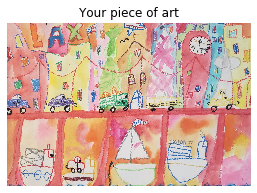

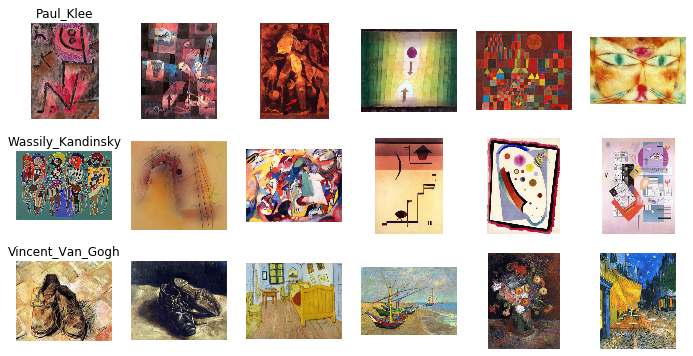

In [14]:
#
# 
#
path_dir = os.path.join(path_base+'/')
path_dir2 = os.path.join(path_base+'/artists2/')
#path = train_folders[0] + train_folder_files[0][0] 
path = path_dir2 + "Cottage_With_Peasant_Woman_Digging_by_Vincent_Van_Gogh_V77.jpg" 
path = path_dir2 + "Entrance_To_A_Quarry_by_Vincent_Van_Gogh_H54.jpg" 
path = path_dir2 + "Farmhouse_In_A_Wheat_Field_by_Vincent_Van_Gogh_Q33.jpg" 
path = path_dir2 + "Portrait_Of_The_Artists_Mother_by_Vincent_Van_Gogh_V43.jpg" 
path = path_dir2 + "Heath_With_Wheelbarrows_by_Vincent_Van_Gogh_L84.jpg" #
path = path_dir + "20200911_204901.jpg" 
#path = path_dir + "20200911_210346.jpg" 
path = path_dir + "20220903_162317.jpg" 
path = path_dir + "20220903_162609.jpg" 
path = path_dir + "20220903_162245.jpg" 


img = mpimg.imread(path)
plt.axis("off")
plt.gca().set_title('Your piece of art')
plt.imshow(img)

img = image.load_img(path, target_size=(150,150))
x = image.img_to_array(img)
x = x/255.0
#print(x.shape)
x = np.expand_dims(x, axis=0)
#print(x.shape)

classes = model.predict(x)

#print(classes[0])
#print(max(classes[0]))
#i=0
#for x in classes[0]:
#    if max(classes[0]) == x:
#        print(artists[i])
#        print(i)
#        break
#    i+=1
    
d=dict()
i=0
for x in classes[0]:
    d.setdefault(x,i)
    i+=1
    
#print(d)

art = []
arti=[]
i=0
for k, v in sorted(d.items(),reverse=True):
    #print('---------', k, 'in', v)
    #print(artists[v])
    art.append(artists[v])
    arti.append(v)
    i+=1
    if i>3:
        break
        
print(f"Your piece of art has a touch of {art[0]}, style of {art[1]} and similar to {art[2]}")

nrows, ncols = 3,6
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 6
next_zero_pix = [os.path.join(train_folders[arti[0]], fname)
                for fname in train_folder_files[arti[0]][pic_index-6:pic_index]]
next_one_pix = [os.path.join(train_folders[arti[1]], fname)
                for fname in train_folder_files[arti[1]][pic_index-6:pic_index]]
next_two_pix = [os.path.join(train_folders[arti[2]], fname)
                for fname in train_folder_files[arti[2]][pic_index-6:pic_index]]


plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
plt.gca().set_title('title')
ax1.title.set_text('First Plot')
ax2.title.set_text('2First Plot')
ax3.title.set_text('3First Plot')
ax4.title.set_text('4 Plot')

axes = [ax1, ax2, ax3, ax4]

for i, img_path in enumerate(next_zero_pix + next_one_pix + next_two_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    if i==0:
        plt.gca().set_title(art[0])
    if i==6:
        plt.gca().set_title(art[1])
    if i==12:
        plt.gca().set_title(art[2])
        
    img = mpimg.imread(img_path)
    #R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    #imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    #plt.imshow(imgGray, cmap='gray')
    
    plt.imshow(img, cmap='gray')

plt.show()

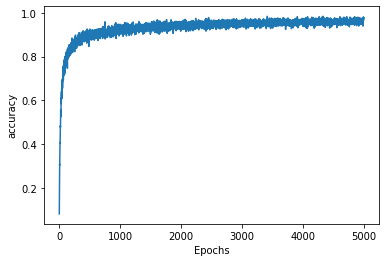

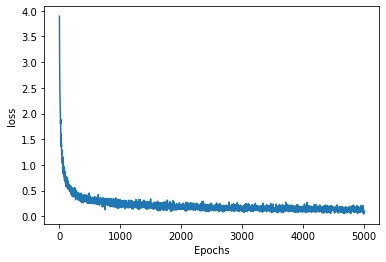

In [12]:
# Visualize the results
# overfit because validation accuracy is slowly dropping while training accuracy is growing
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    #plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    #plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [15]:
tf.keras.models.save_model(model, 'final/save_model/')

INFO:tensorflow:Assets written to: final/save_model/assets


In [16]:
tf.saved_model.save(model, 'final/saved_model/')


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: final/saved_model/assets


In [20]:
model.save('final_model.h5')